## Document Classification

In [ ]:
It can be useful to be able to classify new "test" documents using already classified "training" documents.  
A common example is using a corpus of labeled spam and ham (non-spam) e-mails to predict whether or not a new document is spam.
Here is one example of such data:  UCI Machine Learning Repository: Spambase Data Set For this project, you can either use 
the above dataset to predict the class of new documents (either withheld from the training dataset or from another source such
as your own spam folder). For more adventurous students, you are welcome (encouraged!) to come up a different set of documents 
(including scraped web pages!?) that have already been classified (e.g. tagged), then analyze these documents to predict 
how new documents should be classified. This assignment is due end of day on Sunday.

In [ ]:
#### Spambase Data Set


Abstract: Classifying Email as Spam or Non-Spam

Source:

Creators:

Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304

Donor: George Forman (gforman at nospam hpl.hp.com) 650-857-7835

Data Set Information:

The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

Our collection of spam e-mails came from our postmaster and individuals who had filed spam. Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam. These are useful when constructing a personalized spam filter. One would either have to blind such non-spam indicators or get a very wide collection of non-spam to generate a general purpose spam filter.

For background on spam:

Cranor, Lorrie F., LaMacchia, Brian A. Spam!
Communications of the ACM, 41(8):74-83, 1998.

(a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
(b) Determine whether a given email is spam or not.
(c) ~7% misclassification error. False positives (marking good mail as spam) are very undesirable.If we insist on zero false positives in the training/testing set, 20-25% of the spam passed through the filter.


Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.

http://archive.ics.uci.edu/ml/datasets/Spambase
    

In [106]:
#!pip install sklearn
#!pip install seaborn
#!pip install statsmodels

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import BernoulliNB #naive-bayes
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
#from nltk.corpus import stopwords 
from nltk.text import Text
from collections import Counter #
import re
import nltk
import string
from nltk.util import bigrams
from nltk.corpus import names
import random
#https://github.com/nltk/nltk/blob/develop/nltk/book.py
#https://www.datacamp.com/tutorial/understanding-logistic-regression-python    

##### Let's load the data

In [25]:
df1 = pd.read_csv('C:\\Users\\owner\\Downloads\\spambase.csv',encoding='latin')
#with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
#    display(df1)
df1.head(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
### 58 columns is a lot, I am curious about the values distribution. The readme says spam =1 and ham(non-spam) = 0 

In [23]:
# Checking for any missing values
df1.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [56]:
# I see there is a class column which contains the target value (spam and ham)
#rename column
#df.rename(columns = {'old_col1':'new_col1', 'old_col2':'new_col2'}, inplace = True)
df1.rename(columns = {'class':'target'}, inplace = True)
df1.target.value_counts()
#df1.iloc[:,[57]].value_counts()


0    2788
1    1813
Name: target, dtype: int64

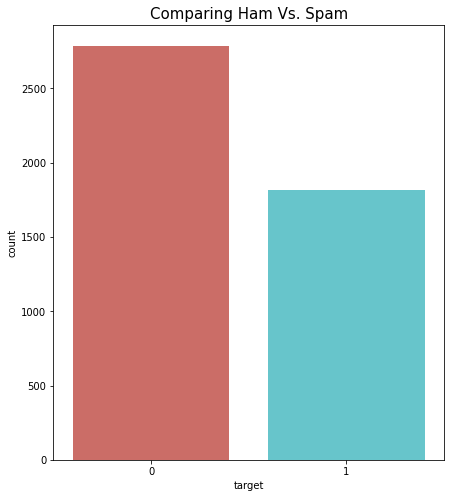

In [79]:
fig = plt.figure(figsize = (7, 8))
plt.title(label="Comparing Ham Vs. Spam",fontsize=15,color="black")
#df1.iloc[:,[57]].hist()
sns.countplot(x = 'target', data = df1, palette = 'hls')
plt.show()
#df1['class'].plot(kind="bar", color=['green', 'red'])

#plt.bar(df1.class)
#df1.class.hist()

array([[<AxesSubplot:title={'center':'word_freq_make'}>,
        <AxesSubplot:title={'center':'word_freq_address'}>],
       [<AxesSubplot:title={'center':'word_freq_all'}>,
        <AxesSubplot:title={'center':'word_freq_remove'}>],
       [<AxesSubplot:title={'center':'word_freq_over'}>,
        <AxesSubplot:title={'center':'word_freq_internet'}>]],
      dtype=object)

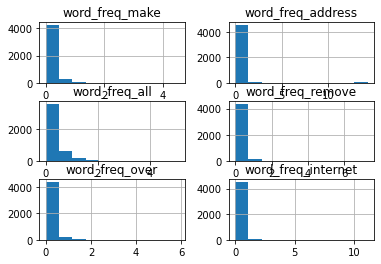

In [77]:
#df1.word_freq_make.hist()
#df1.word_freq_address.hist()
#df1.hist()
df1.iloc[:,[0,1,2,6,5, 7]].hist()


In [ ]:
The target variable is has binary values. So, we can use logistic regression to classify the spam email

The supervised algorigthm is used to display relationship among variables.
Under supervised machine, there is classification which predicts based on set of features. 
classification requires discrete and finite outputs called classes or categories. 

In [ ]:
##### Modeling
## Let's split the data into test and train

In [80]:
list(df1)

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_%3B',
 'char_freq_%28',
 'char_freq_%5

In [81]:
colnames = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove',
 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report',
 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your',
 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab',
 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology',
 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original',
 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_%3B', 'char_freq_%28',
 'char_freq_%5B', 'char_freq_%21', 'char_freq_%24', 'char_freq_%23', 'capital_run_length_average', 'capital_run_length_longest',
 'capital_run_length_total']

x = df1[colnames]
y = df1.target

In [82]:
# Splitting df1 in training set and testing sets
trainX,testX,trainY,testY=train_test_split(x,y,test_size=0.2,random_state=0)

#Now, we have splitted the data in training and testing ,...we need to scale up the input
#scale = StandardScaler() # calling the function
#trainX = scale.fit_transform(trainX)
#testX = scale.fit_transform(testX)

In [83]:
## Calling logistic function for our model ...solver='liblinear',
model = LogisticRegression()
model.fit(x, y)

train, test = train_test_split(df, test_size=0.2)

C:\Users\owner\opencv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### Fitting our model with 80% training data

In [84]:
model.fit(trainX,trainY)

C:\Users\owner\opencv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [86]:
model_pred=model.predict(testX)
#model_pred

##### Evaluating our model Performance

In [100]:
####### Model Accuracy
model.score(testX,testY)

0.9218241042345277

92.2% accuracy on performance test is good.wonder if there is any overfitting...we can verify by checking accuracy on training
model.score(trainX,trainY)....0.9214673913043478


0.9214673913043478

Text(0.5, 257.44, 'Predicted label')

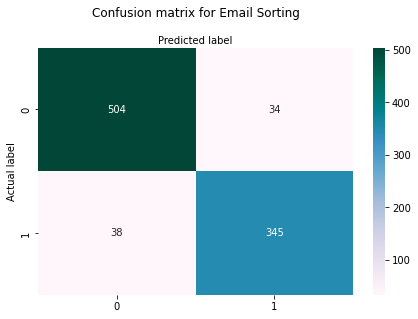

In [96]:
#A confusion matrix is a table that is used to evaluate the performance of a classification model. 
#You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct
#and incorrect predictions
confusion_matrix = metrics.confusion_matrix(testY, model_pred)
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="PuBuGn" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Email Sorting', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [ ]:
According to the confusion matrix, our model correctly predicted 504 email to be non-spam (ham) and 345 email to be spam. 
38 email labeled as spam ones were incorrectly classified as non-spam email ...Oooops somebody got more email to go through
34 email labeled as non-spam ones were incorrectly classified as spam email....Oooops somebody got some email lost

In [102]:
print(classification_report(testY, model_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       538
           1       0.91      0.90      0.91       383

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



We already saw that the model was 92.2 % accurate ...this time, we can see that the model will be precised in predictiing non-spam
email 93% of the time and 91% for spam email. This is considered good as no model is perfect. fishers and hackers always have 
an advance on tricking good systems...Good systems are reactive most of the time. 

There are a time where a good company will tell you to look for their email in the spam folder. This might sound unbelievable
but in the world of technology, it can makes sense and it is possible. If one filter/firewall system behind the others, the
likelyhood for suc error to occur is possible. So, it is good to check the spam folder sometimes.

Precision and accuracy often bring confusion. A good way to apprehend the difference is to think about a mechanic system like 
mechanic watch, relays, switches, etc. Most of the time accuracy on these systems means that if the relay is supposed to 
react to a fault within let's say 1min setting, the actual response might occur at 1.05 min or 1.03min...that is approximately
within +5% tolerance...that is how accurate the relay performs. On the other hands, this relay is supposed to trip whenever 
it senses the fault and it does each time regardless...that is how the relay is precised...Such system have higher expectation
in the range of 99% if not 100% because the consequence might be a disaster. Our model says that we can count on it to be effective
91% in capturing spam email...that leave us with 9% of expected bad mail in the mail folder to go through. 

This performance is based on 
non-spam    2788
spam        1813

A company/individual receiving 1813 spam can be huge if it is like weekly...Something need to be done.
I get minimum of 1000 email per week at work. I never actually pay attention to count the spam/junk folder.


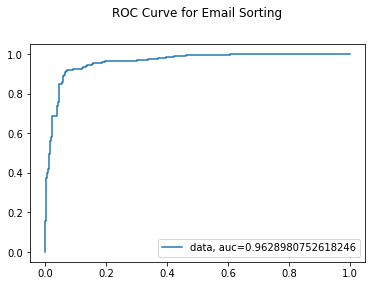

In [120]:
## ROC Curve is sometime used to tell how good a classifier is. 

model_pred_prob = model.predict_proba(testX)[::,1]
fpr, tpr, _ = metrics.roc_curve(testY,  model_pred_prob)  #True Positive Rate (trp), False Positive Rate(fpr)
auc = metrics.roc_auc_score(testY, model_pred_prob)
plt.title('ROC Curve for Email Sorting', y=1.1)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

The ROC Curve is telling us that based on the AUC(area under curve) score 0.96...our model is close to perfect.
Let's say the model did not perform well...meaning we got like 0.60 AUC score. 
What could we do to improve our model performance?
One way is to check the significance of each independent variable in relationship with the target variable. 

In [110]:
model_logit=sm.Logit(y,x)
model_fit=model_logit.fit()
print(model_fit.summary2())

Optimization terminated successfully.
         Current function value: 0.212842
         Iterations 15
                               Results: Logit
Model:                  Logit                Pseudo R-squared:     0.683    
Dependent Variable:     target               AIC:                  2072.5739
Date:                   2022-07-18 16:11     BIC:                  2439.3136
No. Observations:       4601                 Log-Likelihood:       -979.29  
Df Model:               56                   LL-Null:              -3085.1  
Df Residuals:           4544                 LLR p-value:          0.0000   
Converged:              1.0000               Scale:                1.0000   
No. Iterations:         15.0000                                             
----------------------------------------------------------------------------
                            Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------------
word

The above result contains p-value for the model...
A p-value is a statistical measurement used to validate a hypothesis against observed data. 
A p-value measures the probability of obtaining the observed results, assuming that the null hypothesis is true. 
The lower the p-value, the greater the statistical significance of the observed difference.

Based on p-values greater than 0.05...the variable should be removed, thereafter, running the new model to see if the performance
has improved. This approach normally improve the model performance because even if Logistic regregression is data hungry, having 
way too many independence variables affect the model...that is one issue that dimensionality deals with.

Another approach in improving the model performance is to try another classifier. For binary classification, Naive Bayes is 
another good classifier. 


https://www.investopedia.com/terms/p/p-value.asp#:~:text=A%20p%2Dvalue%20is%20a,significance%20of%20the%20observed%20difference.

In [117]:
# Let's call the naive-bayes function...
model2 = BernoulliNB()

# training the model
model2.fit(trainX,trainY)

# testing the model
model2_pred = model2.predict(testX)
print(accuracy_score(model2_pred, testY))


0.8773072747014115


the model actually dropped in performance, meaning , logistic regression is better for this email classification